# The Utilities Module

The `utilities` module of the `repytah` package holds functions commonly called by other modules in order for the entire package to run smoothly.
`utilities` includes the following functions:
- `create_sdm`: Creates a self-dissimilarity matrix; this matrix is found by creating audio shingles from feature vectors, and finding the cosine distance between shingles.

- `find_initial_repeats`: Finds all diagonals present in **thresh\_mat**, removing each diagonal as it is found.

- `stretch_diags`: Fills out diagonals in binary self-dissimilarity matrix from diagonal starts and lengths.

- `add_annotations`: Adds annotations to each pair of repeated structures according to their length and order of occurrence. 

- `get_annotation_list`: Gets one annotation marker vector, given vector of lengths **key\_lst**.

- `get_y_labels`: Generates the labels for visualization with **width\_vec** and **anno\_vec**.

- `reformat` *(only used for creating test examples)*: Transforms a binary matrix representation of when repeats occur in a song into a list of repeated structures detailing the length and occurrence of each repeat.  
    
These functions are called multiple times throughout the package to reformat the outputs of various functions. Functions from `utilities` are shown in yellow in the example function pipeline below.
<img src="pictures/function_pipeline.jpg" width="380">

### Importing necessary modules

In [1]:
# NumPy is used for mathematical calculations
import numpy as np

# Matplotlib is used to display output
import matplotlib.pyplot as plt

# Import utilities
from repytah.utilities import *

## create_sdm

This function creates a self-dissimilarity matrix. This matrix is found by creating audio shingles from feature vectors, and finding the cosine distance between shingles.

The inputs for the function are:
- __fv_mat__ (np.ndarray): A matrix of feature vectors where each column is a timestep and each row includes feature information. i.e. an array of 144 columns/beats and 12 rows corresponding to chroma values.
- __num_fv_per_shingle__ (int): The number of feature vectors per audio shingle

The output for the function is:
- __self_dissim_mat__ (np.ndarray): A self-dissimilarity matrix with paired cosine distances between shingles

In [2]:
fv_mat = np.array([[0, 0.5, 0, 0, 0, 1, 0, 0],
                   [0,   2, 0, 0, 0, 0, 0, 0],
                   [0,   0, 0, 0, 0, 0, 3, 0],
                   [0,   3, 0, 0, 2, 0, 0, 0],
                   [0, 1.5, 0, 0, 5, 0, 0, 0]])

num_fv_per_shingle = 3

print('The input matrix of feature vectors is:\n', fv_mat)
print('The number of feature vectors per audio shingles is:', num_fv_per_shingle)

The input matrix of feature vectors is:
 [[0.  0.5 0.  0.  0.  1.  0.  0. ]
 [0.  2.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  3.  0. ]
 [0.  3.  0.  0.  2.  0.  0.  0. ]
 [0.  1.5 0.  0.  5.  0.  0.  0. ]]
The number of feature vectors per audio shingles is: 3


In [3]:
self_dissim_mat  = create_sdm(fv_mat, num_fv_per_shingle)
print('The resulting self-dissimilarity matrix is:\n', self_dissim_mat)

The resulting self-dissimilarity matrix is:
 [[0.         1.         1.         0.37395249 0.9796637  1.        ]
 [1.         0.         1.         1.         0.45092001 0.95983903]
 [1.         1.         0.         1.         1.         1.        ]
 [0.37395249 1.         1.         0.         1.         1.        ]
 [0.9796637  0.45092001 1.         1.         0.         1.        ]
 [1.         0.95983903 1.         1.         1.         0.        ]]


The resulting self-dissimilarity can be shown as a picture in which the color represents the similarity between two shingles. The darker the color of a pixel, the more similar the two shingles are.  

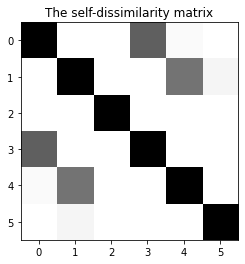

In [4]:
plt.imshow(self_dissim_mat,cmap='gray')
plt.title("The self-dissimilarity matrix")
plt.show()

## find_initial_repeats

This function identifies all repeated structures in a sequential data stream which are represented as diagonals in **thresh\_mat** and then stores the pairs of repeats that correspond to each repeated structure in a list. The function finds the diagonals of lengths from the largest to the smallest, searches for non-overlapping shingles first, and cuts the overlapping shingles to up to 3 non-overlapping parts. As each diagonal is found, they are removed to avoid identifying repeated sub-structures. 

The image below illustrates the overlapping parts given two repeats starting with time steps $i$ and $j$ and having length $k$. The left and right segments will always exist because $i \neq j$, but the middle segment will only exist if $k > 2(j - i)$.

![alt text](pictures/find_initial_repeats.png)

The inputs for the function are:
- __thresh_mat__ (np.ndarray): A thresholded matrix from which diagonals are extracted
- __bandwidth_vec__ (np.ndarray): An array of lengths of diagonals to be found
- __thresh_bw__ (int): The smallest allowed diagonal length

The output for the function is:
- __all_lst__ (np.ndarray): Pairs of repeats that correspond to diagonals in **thresh\_mat**

In [5]:
thresh_mat = np.array([[1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                       [0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
                       [0, 0, 1, 0, 0, 1, 1, 0, 0, 1],
                       [1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
                       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
                       [0, 1, 1, 0, 0, 1, 0, 1, 1, 0],
                       [0, 0, 1, 1, 1, 0, 1, 0, 1, 0],
                       [1, 0, 0, 1, 0, 1, 0, 1, 0, 1],
                       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
                       [0, 0, 1, 0, 0, 0, 0, 1, 0, 1]])

bandwidth_vec = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
thresh_bw = 0

print('The thresholded matrix is:\n', thresh_mat)
print('The lengths of diagonals to be found are:', bandwidth_vec)
print('The smalled allowed diagonal length is:', thresh_bw)

The thresholded matrix is:
 [[1 0 0 1 0 0 0 1 0 0]
 [0 1 0 0 1 1 0 0 1 0]
 [0 0 1 0 0 1 1 0 0 1]
 [1 0 0 1 0 0 1 1 0 0]
 [0 1 0 0 1 0 1 0 0 0]
 [0 1 1 0 0 1 0 1 1 0]
 [0 0 1 1 1 0 1 0 1 0]
 [1 0 0 1 0 1 0 1 0 1]
 [0 1 0 0 0 1 1 0 1 0]
 [0 0 1 0 0 0 0 1 0 1]]
The lengths of diagonals to be found are: [ 1  2  3  4  5  6  7  8  9 10]
The smalled allowed diagonal length is: 0


In [6]:
all_lst = find_initial_repeats(thresh_mat, bandwidth_vec, thresh_bw)

print("The pairs of repeats are:\n", all_lst)

The pairs of repeats are:
 [[ 6  6  9  9  1]
 [ 5  6  7  8  2]
 [ 7  8  9 10  2]
 [ 1  3  4  6  3]
 [ 1  3  8 10  3]
 [ 2  4  5  7  3]
 [ 2  4  6  8  3]
 [ 1 10  1 10 10]]


## stretch_diags

This function creates a binary matrix with full-length diagonals from a binary matrix of diagonal starts and length of diagonals.
        
The inputs for the function are:
- __thresh_diags__ (np.ndarray): A binary matrix where entries equal to 1 signals the existence of a diagonal
- __band_width__ (int): The length of encoded diagonals

The output for the function is:
- __stretch_diag_mat__ (np.ndarray): A logical matrix with diagonals of length __band\_width__ starting at each entry prescribed in __thresh\_diag__

In [7]:
thresh_diags = np.matrix([[0, 0, 1, 0, 0],
                          [0, 1, 0, 0, 0],
                          [0, 0, 1, 0, 0],
                          [0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0]])

band_width = 3

print("The input matrix is:\n", thresh_diags)
print("The length of the encoded diagonals is:", band_width)

The input matrix is:
 [[0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
The length of the encoded diagonals is: 3


In [8]:
stretched_diagonal = stretch_diags(thresh_diags, band_width)

print("The output matrix is:\n", stretched_diagonal)

The output matrix is:
 [[False False False False False False False]
 [False  True False False False False False]
 [ True False  True False False False False]
 [False  True False  True False False False]
 [False False  True False  True False False]
 [False False False False False False False]
 [False False False False False False False]]


## add_annotations

This function adds annotations to each pair of repeated structures in **input\_mat** according to their length and order of occurrence to differentiate between different repeats of the same length. 

The inputs for the function are:
- __input_mat__ (np.ndarray): Pairs of repeats. The first two columns refer to the first repeat of the pair. The third and fourth columns refer to the second repeat of the pair. The fifth column refers to the repeat lengths. The sixth column contains any previous annotations, which will be removed.
- __song_length__ (int): The number of shingles in the song

The output for the function is:
- __anno_list__ (np.ndarray): Pairs of repeats with annotations marked

In [9]:
input_mat = np.array([[2,  5,  8, 11, 4, 0],
                      [7, 10, 14, 17, 4, 0],
                      [2,  5, 15, 18, 4, 0],
                      [8, 11, 15, 18, 4, 0],
                      [9, 12, 16, 19, 4, 0]])

song_length = 19

print("The input array is: \n", input_mat)
print("The number of shingles is:", song_length)

The input array is: 
 [[ 2  5  8 11  4  0]
 [ 7 10 14 17  4  0]
 [ 2  5 15 18  4  0]
 [ 8 11 15 18  4  0]
 [ 9 12 16 19  4  0]]
The number of shingles is: 19


In [10]:
annotated_array = add_annotations(input_mat, song_length)
print("The array of repeats with annotations is:\n", annotated_array)

The array of repeats with annotations is:
 [[ 2  5  8 11  4  1]
 [ 2  5 15 18  4  1]
 [ 8 11 15 18  4  1]
 [ 7 10 14 17  4  2]
 [ 9 12 16 19  4  3]]


## reconstruct_full_block

This function creates a record of when pairs of repeated structures occur, from the first beat in the song to the end. This record is a binary matrix with a block of 1's for each repeat encoded in **pattern\_mat** whose length is encoded in **pattern\_key**. By looping over all rows of **pattern\_mat**, `reconstruct_full_block` reconstructs each row using the **pattern\_key**. 

For each row of **pattern\_mat**, a new row is created for **pattern\_block** by looping over the same row of **pattern\_mat** and shifting the position of 1's the number of times equivalent to the length of the repeat, storing each unique row with shifted values in a separate array. The sum of all of the shifted rows is then taken along the x-axis, thus creating a row that represents where each repeat occurs with blocks of 1's.

For example, if the row in **pattern\_mat** is [0 0 1 0 0 0 0 0 1 0 0 0 1 0 0], with a repeat length of 3, then new rows created by the for loop are:
<br><br>
<center>[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0]<br>
[0 0 0 1 0 0 0 0 0 1 0 0 0 1 0]<br>
[0 0 0 0 1 0 0 0 0 0 1 0 0 0 1]<br></center><br> 

These rows are then summed along the y-axis to become: [0 0 1 1 1 0 0 0 1 1 1 0 1 1 1] This is then appended to the output **pattern\_block**. 

The inputs for the function are:
- __pattern_mat__ (np.ndarray): A binary matrix with 1's where repeats begin and 0's otherwise
- __pattern_key__ (np.ndarray): The number of feature vectors per audio shingle

The output for the function is:
- __pattern_block__ (np.ndarray): A binary matrix representation for **pattern\_mat** with blocks of 1's equal to the length's prescribed in **pattern\_key**

In [11]:
pattern_mat  = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                         [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

pattern_key  = np.array([1, 2, 2, 3, 4])

print("The input binary matrix is:\n", pattern_mat)
print("The input pattern key is:\n", pattern_key)

The input binary matrix is:
 [[0 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]]
The input pattern key is:
 [1 2 2 3 4]


In [12]:
pattern_block  = reconstruct_full_block(pattern_mat, pattern_key)
print("The reconstructed full block is:\n", pattern_block)

The reconstructed full block is:
 [[0 0 0 0 1 0 0 0 0 1]
 [0 1 1 0 0 0 0 1 1 0]
 [0 0 1 1 0 0 0 0 1 1]
 [1 1 1 0 0 0 1 1 1 0]
 [1 1 1 1 0 0 1 1 1 1]]


## get_annotation_list

This function takes in a vector of lengths **key\_lst**, counts the time each length occurs as its annotation maker, and outputs all annotation markers as a vector.
    
The input for the function is:
- **key_lst** (np.ndarray): Array of lengths in ascending order

The output for the function is:
- **anno_lst_out** (np.ndarray): Array of one possible set of annotation markers for **key\_lst**

In [13]:
key_lst = np.array([1, 2, 2, 3, 3, 3, 5, 7, 8, 8, 9])

print("The input array of lengths is: \n", key_lst)

The input array of lengths is: 
 [1 2 2 3 3 3 5 7 8 8 9]


In [14]:
anno_lst_out  = get_annotation_lst(key_lst)

print("The output array is: \n", anno_lst_out )

The output array is: 
 [1 1 2 1 2 3 1 1 1 2 1]


## get_y_labels
This function generates labels for visualization with repeat lengths and annotations of each length. Note that the first 0 is always printed out because it acts as the hidden origin label for the later visualization.

The inputs for the function are:

- **width_vec** (np.ndarray): Vector of widths for a visualization
- **anno_vec** (np.ndarray): Array of annotations for a visualization

The output for the function is:
- **y_labels**(str): Labels for the y-axis of a visualization

In [15]:
width_vec = np.array([[1], [2], [3], [4], [4], [5], [5], [6]])
anno_vec = np.array([1, 1, 1, 1, 2, 1, 1, 1])

print("The vector of widths is: \n", width_vec)
print("The array of annotation makers is: \n", anno_vec)

The vector of widths is: 
 [[1]
 [2]
 [3]
 [4]
 [4]
 [5]
 [5]
 [6]]
The array of annotation makers is: 
 [1 1 1 1 2 1 1 1]


In [16]:
y_labels = get_y_labels(width_vec, anno_vec)

print("The output string is: \n", y_labels)

The output string is: 
 ['0' 'w = 1, a = 1' 'w = 2, a = 1' 'w = 3, a = 1' 'w = 4, a = 1'
 'w = 4, a = 2' 'w = 5, a = 1' 'w = 5, a = 1' 'w = 6, a = 1']


## reformat

This function is helpful when writing example inputs for aligned hierarchies. It is not used in the main functions for creating the aligned hierarchies. It first finds the starting indices of the repeated structures row by row, and assigns the time steps of the repeated structures based on starting indices.
        
The inputs for the function are:
- __pattern_mat__ (np.ndarray): Binary array with 1's where repeats start and 0's otherwise 
- __pattern_key__ (np.ndarray): Array with the lengths of each repeated structure in **pattern\_mat**

The output for the function is:
- __info_mat__ (np.ndarray): Array with the time steps of when the pairs of repeated structures start and end organized

In [17]:
pattern_mat = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                        [0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                        [0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
                        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

pattern_key = np.array([1, 2, 2, 3, 4])

print("The input matrix is:\n", pattern_mat)
print("The length of repeated structure is:", pattern_key)

The input matrix is:
 [[0 0 0 0 1 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 1 0 0 0]]
The length of repeated structure is: [1 2 2 3 4]


In [18]:
info_mat  = reformat(pattern_mat, pattern_key)

print("The output matrix is:\n", info_mat)

The output matrix is:
 [[ 5  5 10 10  1]
 [ 2  3  8  9  2]
 [ 3  4  9 10  2]
 [ 1  3  7  9  3]
 [ 1  4  7 10  4]]
